<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%A1%D1%91%D1%80%D0%B5%D0%BD%D1%81%D0%B5%D0%BD_%D0%94%D0%B0%D0%B9%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружаем все необходимые модули:

In [1]:
!pip install multiset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from multiset import Multiset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Создаём функцию, которая считает коэффициент Сёренсена-Дайса для двух корпусов:

In [3]:
def tokenizetext(txt):
    arr = []
    for wrd in txt:
        arr += [wrd]
    return Multiset(arr)


def sorenson_dice(text1, text2):
    ''' Sorenson-Dice similarity of Multisets '''
    bc1, bc2 = tokenizetext(text1), tokenizetext(text2)
    return 2 * len(bc1 & bc2) / (len(bc1) + len(bc2))

Загружаем гарвардские данные:

In [4]:
df = pd.read_csv('lemmas_levels.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
mark1 = "1E"
mark2 = "2I"
mark3 = "3AU"
mark4 = "4S"
ll1 = df.query('level == @mark1')
ll2 = df.query('level == @mark2')
ll3 = df.query('level == @mark3')
ll4 = df.query('level == @mark4')

Загружаем данные из словаря частотности Шарова:

In [5]:
df = pd.read_csv('dictionary_csv.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
dc1 = df[:1000]
dc2 = df[1000:2000]
dc3 = df[2000:3000]
dc4 = df[3000:]

Проверяем работу функции. Сравниваем два одинаковых корпуса:

In [ ]:
data1 = dc1['lemma'].str.lower()
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 1.0


Теперь сравниваем корпус с одинаковым корпусом, который был увеличен в два раза:

In [ ]:
data1 = dc1['lemma'].str.lower().append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.6666666666666666


<ipython-input-6-6ed9d711d78a>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = dc1['lemma'].str.lower().append(dc1['lemma'].str.lower())


In [ ]:
len(data1)

2000

В три раза:

In [ ]:
data1 = data1.append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.5


<ipython-input-8-030b0ec7314b>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = data1.append(dc1['lemma'].str.lower())


In [ ]:
len(data1)

3000

В четыре раза:

In [ ]:
data1 = data1.append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4


<ipython-input-10-030b0ec7314b>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = data1.append(dc1['lemma'].str.lower())


Сравниваем уровень А1 для гарвардских данных и Шарова:

In [ ]:
data1 = ll1['lemma'].str.strip('\'')
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.43487321986800975


Сравниваем уровень А2 для гарвардских данных и Шарова:

In [ ]:
data1 = ll2['lemma'].str.strip('\'')
data2 = dc2['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.161055750067331


Сравниваем уровень В1 для гарвардских данных и Шарова:

In [ ]:
data1 = ll3['lemma'].str.strip('\'')
data2 = dc3['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.011102947179361581


Сравниваем уровень В2 для гарвардских данных и Шарова:

In [ ]:
data1 = ll4['lemma'].str.strip('\'')
data2 = dc4['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.018772266374349138


Загружаем данные SMARTool A1:

In [89]:
df = pd.read_csv('A1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A1 = df[:754]

Сравниваем уровень А1 для гарвардских данных и SMARTool:

In [ ]:
data1 = ll1['lemma'].str.strip('\'')
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4238511203949867


Загружаем данные SMARTool А2:

In [90]:
df = pd.read_csv('A2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A2 = df[:1048]

Сравниваем уровень А2 для гарвардских данных и SMARTool:

In [ ]:
data1 = ll2['lemma'].str.strip('\'')
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12390321722946025


Загружаем данные SMARTool В1:

In [91]:
df = pd.read_csv('B1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B1 = df[:1081]

Сравниваем уровень В1 для гарвардских данных и SMARTool:

In [ ]:
data1 = ll3['lemma'].str.strip('\'')
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.008110300081103


Загружаем данные SMARTool В2:

In [92]:
df = pd.read_csv('B2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B2 = df[:3331]

Сравниваем уровень B2 для гарвардских данных и SMARTool:

In [ ]:
data1 = ll4['lemma'].str.strip('\'')
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.03403026307528097


Сравниваем уровень A1 для Шарова и SMARTool:

In [ ]:
data1 = dc1['lemma'].str.lower()
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.35347776510832385


Сравниваем уровень A2 для Шарова и SMARTool:

In [ ]:
data1 = dc2['lemma'].str.lower()
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.14453125


Сравниваем уровень В1 для Шарова и SMARTool:

In [ ]:
data1 = dc3['lemma'].str.lower()
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12686208553580008


Сравниваем уровень В2 для Шарова и SMARTool:

In [ ]:
data1 = dc4['lemma'].str.lower()
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.2134683924216845


Загружаем данные LM А1:

In [71]:
df = pd.read_csv('new_vocab_a1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv1 = df

In [72]:
len(df)

994

Сравниваем уровень А1 для гарвардских данных и LM:

In [73]:
data1 = ll1['lemma'].str.strip('\'')
data2 = nv1['а'].str.lower().tolist()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4949530107901149


Загружаем данные LM А2:

In [74]:
df = pd.read_csv('new_vocab_a2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv2 = df

In [75]:
data8 = nv2['а'].str.lower().tolist()
result=list(set(data8) - set(data2))
len(result)

581

In [76]:
len(data8)

1548

In [77]:
print(result[:20])
print(data2[:20])

['грустный', 'воздух', 'удобный', 'лес', 'полагать', 'уезжать', 'корабль', 'казаться', 'иванович', 'чтение', 'доказывать', 'лыжа', 'слышать', 'разговор', 'случаться', 'читатель', 'физический', 'школьник', 'варить', 'продолжаться']
['абстрактный', 'август', 'австралия', 'автобус', 'автор', 'адрес', 'азия', 'активный', 'александр', 'александра', 'алексей', 'алеша', 'алла', 'америка', 'английски', 'английский', 'англичанин', 'англичанка', 'англия', 'англо-русский']


Сравниваем уровень А2 для гарвардских данных и LM:

In [78]:
data1 = ll2['lemma'].str.strip('\'')
data2 = result
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.08743169398907104


Загружаем данные LM В1:

In [79]:
df = pd.read_csv('new_vocab_b1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv3 = df

In [80]:
data7 = nv3['а'].str.lower().tolist()
result2=list(set(data7) - set(data8))
len(result)

581

In [81]:
len(data7)

2470

Сравниваем уровень В1 для гарвардских данных и LM:

In [82]:
data1 = ll3['lemma'].str.strip('\'')
data2 = result2
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.006890894175553733


Загружаем данные LM В2:

In [83]:
df = pd.read_csv('new_vocab_b2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv4 = df

In [84]:
data6 = nv4['а'].str.lower().tolist()
result3=list(set(data6) - set(data7))
len(result3)

3218

In [85]:
len(data6)

5488

Сравниваем уровень В2 для гарвардских данных и LM:

In [86]:
data1 = ll4['lemma'].str.strip('\'')
data2 = result3
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.034779309472619195


Сравниваем уровень А1 для Шарова и LM:

In [87]:
data1 = dc1['lemma'].str.lower()
data2 = nv1['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.41624874623871616


Сравниваем уровень А1 для SMARTool и LM:

In [93]:
data1 = nv1['а'].str.lower()
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.816933638443936


Сравниваем уровень А2 для Шарова и LM:

In [94]:
data1 = dc2['lemma'].str.lower()
data2 = result
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.14294750158127767


Сравниваем уровень А2 для SMARTool и LM:

In [95]:
data1 = result
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.6114180478821363


Сравниваем уровень В1 для Шарова и LM:

In [96]:
data1 = dc3['lemma'].str.lower()
data2 = result2
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.13807315816589386


Сравниваем уровень B1 для SMARTool и LM:

In [97]:
data1 = result2
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.9149357072205737


Сравниваем уровень В2 для Шарова и LM:

In [98]:
data1 = dc4['lemma'].str.lower()
data2 = result3
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.22077424300498275


Сравниваем уровень B2 для SMARTool и LM:

In [99]:
data1 = result3
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.9680867307985952


Создаём тепловую матрицу для уровня А1:

In [102]:
columns=['VRT (0)', 'Sharoff (1)', 'SMARTool (2)', 'LM (3)']

data = [
[1, 0.44, 0.42, 0.5],
[0.44, 1, 0.35, 0.22],
[0.42, 0.35, 1, 0.82],
[0.5, 0.22, 0.82, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

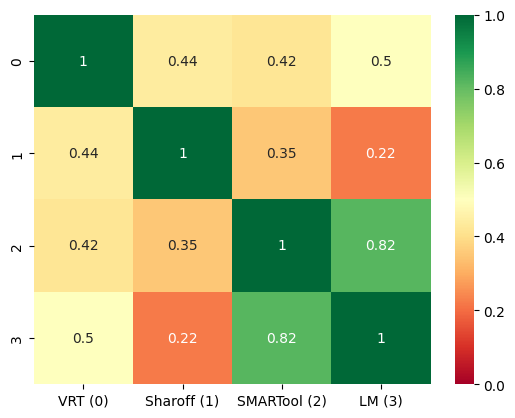

In [103]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')

Создаём тепловую матрицу для уровня А2:

In [104]:
columns=['VRT (0)', 'Sharoff (1)', 'SMARTool (2)', 'LM (3)']

data = [
[1, 0.16, 0.12, 0.09],
[0.16, 1, 0.15, 0.14],
[0.12, 0.15, 1, 0.61],
[0.09, 0.14, 0.61, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

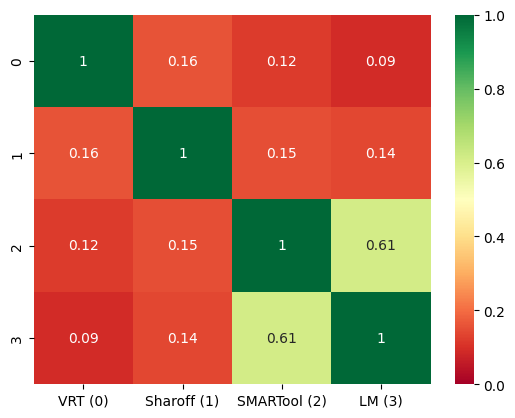

In [105]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')

Создаём тепловую матрицу для уровня В1:

In [106]:
columns=['VRT (0)', 'Sharoff (1)', 'SMARTool (2)', 'LM (3)']

data = [
[1, 0.01, 0.01, 0.01],
[0.01, 1, 0.13, 0.14],
[0.01, 0.13, 1, 0.92],
[0.01, 0.14, 0.92, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

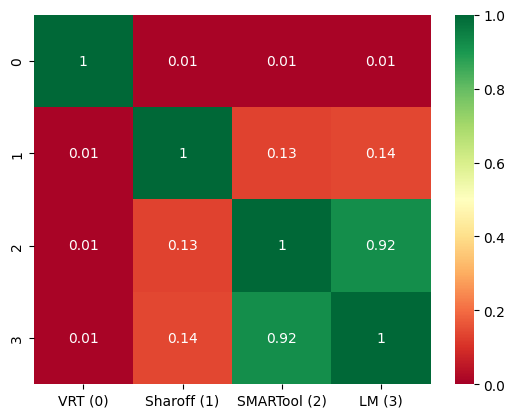

In [107]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')

Создаём тепловую матрицу для уровня В2:

In [108]:
columns=['VRT (0)', 'Sharoff (1)', 'SMARTool (2)', 'LM (3)']

data = [
[1, 0.02, 0.03, 0.03],
[0.02, 1, 0.21, 0.22],
[0.03, 0.21, 1, 0.97],
[0.03, 0.22, 0.97, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

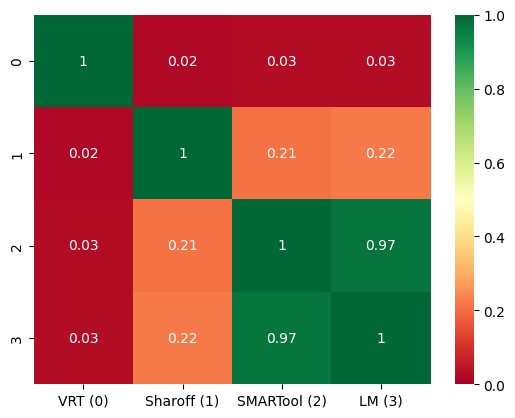

In [109]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')